# Lab Assignment 2



### Harry Han, s2162783

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 4t-3y, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [42]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import math

def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

timesteps(0, 0.5, h = 0.1)

def ode_Euler(func, times, y0):
    '''
    integrates the system of y' = func(y, t) using forward Euler method
    for the time steps in times and given initial condition y0
    ----------------------------------------------------------
    inputs:
        func: the RHS function in the system of ODE
        times: the points in time (or the span of independent variable in ODE)
        y0: initial condition (make sure the dimension of y0 and func are the same)
    output:
        y: the solution of ODE. 
        Each row in the solution array y corresponds to a value returned in column vector t
    '''
    # guess why I put these two lines here?
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y

def ode_AB2(func, times, y0):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    dt = times[1] - times[0]
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nT-1):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt
       
    return y 

def ode_AB3(func, times, y0):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    dt = times[1] - times[0]
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Second step using AB2
    y[2,:] = y[1,:] + dt*(1.5*func(y[1, :], times[1])-0.5*func(y[0, :], times[0]))
    # Other steps
    for k in range(2, nT-1):
        y[k+1,:] = y[k,:] + (23/12*func(y[k, :], times[k])-4/3*func(y[k-1, :], times[k-1])+5/12*func(y[k-2, :], times[k-2]))*dt
       
    return y



def Euler_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    return ode_Euler(func, times, ics), times

def AB2_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    return ode_AB2(func, times, ics), times

def AB3_step(func, start, stop, h, ics):
    times = timesteps(start, stop, h)
    return ode_AB3(func, times, ics), times


In [43]:
#  defining the function in the RHS of the ODE given in the question

def RHS(y, t):
    return 4*t-3*y


Text(0.5, 1.0, "Numerical Solutions of the ODE y' = 4t-3y")

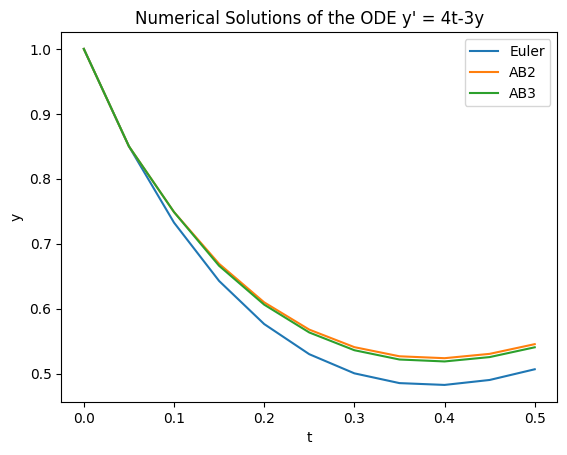

In [119]:
from pandas import DataFrame

Euler_res, Euler_times = Euler_step(RHS, 0, 0.5, 0.05, [1])
Euler_res_DataFrame = DataFrame(data = Euler_res, index = Euler_times, columns = ["h=0.05"]).set_index(Euler_times).rename_axis('t', axis=1)

# set caption
Euler_res_DataFrame.style.set_caption("Euler")

AB2_res, AB2_times = AB2_step(RHS, 0, 0.5, 0.05, [1])
AB2_res_DataFrame = DataFrame(data = AB2_res, index = AB2_times, columns = ["h=0.05"]).set_index(AB2_times).rename_axis('t', axis=1)

AB3_res, AB3_times = AB3_step(RHS, 0, 0.5, 0.05, [1])
AB3_res_DataFrame = DataFrame(data = AB3_res, index = AB3_times, columns = ["h=0.05"]).set_index(AB3_times).rename_axis('t', axis=1)

# Plotting the results
plt.plot(Euler_times, Euler_res_DataFrame, label = 'Euler')
plt.plot(AB2_times, AB2_res, label = 'AB2')
plt.plot(AB3_times, AB3_res, label = 'AB3')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions of the ODE y\' = 4t-3y')

In [167]:
# printing the solution in a table
print('Euler solution')
display(Euler_res_DataFrame)
print('AB2 solution')
display(AB2_res_DataFrame)
print('AB3 solution')
display(AB3_res_DataFrame)


Euler solution


t,h=0.05
0.00,1.000000
0.05,0.850000
0.10,0.732500
0.15,0.642625
0.20,0.576231
0.25,0.529797
0.30,0.500327
0.35,0.485278
0.40,0.482486
0.45,0.490113


AB2 solution


t,h=0.05
0.00,1.000000
0.05,0.850000
0.10,0.748750
0.15,0.669031
0.20,0.609655
0.25,0.567660
0.30,0.540661
0.35,0.526587
0.40,0.523654
0.45,0.530326


AB3 solution


t,h=0.05
0.00,1.000000
0.05,0.850000
0.10,0.748750
0.15,0.665984
0.20,0.606139
0.25,0.563274
0.30,0.535936
0.35,0.521626
0.40,0.518641
0.45,0.525361


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 4t-3y$, with $y(0)=1$, present the analytical solution. What is the value $y(0.5)$? Also, find the value of $t=t_{m}$ where $y(t)$ achieves a minimum value. What is the value of $y_{m} = y(t_{m})$?

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$ and $y_{m}$. Which method is the most/least accurate? Why?

In [54]:
# standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

Write you answer here!

In [158]:
from sympy import Interval, Symbol, S, sin, cos, minimum
from sympy.solvers import solve


# defining the function in the RHS of the ODE given in the question
def RHS(y, t):
    return 4*t-3*y

t = sym.symbols('t')
y = sym.Function('y')

eq1 = sym.Eq(y(t).diff(t), RHS(y(t), t))
eq1sol = sym.dsolve(eq1, y(t), ics = {y(0): 1})

print('The analytical solution of the ODE is')
display_latex(eq1sol)

print('The analytical solution of the ODE at t = 0.5 is')
display_latex(eq1sol.subs(t, 0.5))

# Find the minimum
ivl = Interval(0, 0.5)
f = sym.Function('f')
f = eq1sol.rhs
minimum = minimum(f, t, ivl)
print('The minimum of the analytical solution of the ODE in the interval [0, 0.5] is')
display_latex(minimum)
print('which is approximately', float(minimum))
mimimum_val = float(minimum)

t_at_min = solve(f - minimum, t)
print('The t at the minimum is')
display_latex(t_at_min)
print('which is approximately', float(t_at_min[0]))

The analytical solution of the ODE is


The analytical solution of the ODE at t = 0.5 is


The minimum of the analytical solution of the ODE in the interval [0, 0.5] is


which is approximately 0.5238466650407316
The t at the minimum is


which is approximately 0.3928849987805487


In [173]:
results = {'Method': ['Euler', 'AB2', 'AB3', 'Analytical'],
           'y(0.5)': [Euler_res_DataFrame.loc[0.5, 'h=0.05'], AB2_res_DataFrame.loc[0.5, 'h=0.05'], AB3_res_DataFrame.loc[0.5, 'h=0.05'], float(eq1sol.rhs.subs(t, 0.5))],
           'Difference at y(0.5)': [abs(Euler_res_DataFrame.loc[0.5, 'h=0.05']- float(eq1sol.rhs.subs(t, 0.5))), abs(AB2_res_DataFrame.loc[0.5, 'h=0.05']- float(eq1sol.rhs.subs(t, 0.5))), abs(AB3_res_DataFrame.loc[0.5, 'h=0.05']- float(eq1sol.rhs.subs(t, 0.5))), 0],
           'y_min': [DataFrame.min(Euler_res_DataFrame['h=0.05']), DataFrame.min(AB2_res_DataFrame['h=0.05']), DataFrame.min(AB3_res_DataFrame['h=0.05']), mimimum_val],
           'Difference of y_min': [abs(DataFrame.min(Euler_res_DataFrame['h=0.05']) - mimimum_val), abs(DataFrame.min(AB2_res_DataFrame['h=0.05']) - mimimum_val), abs(DataFrame.min(AB3_res_DataFrame['h=0.05']) - mimimum_val), 0]}

# Create DataFrame
df = DataFrame(results, columns = ['Method', 'y(0.5)', 'Difference at y(0.5)', 'y_min', 'Difference of y_min'])
df = df.set_index('Method')
df.style.set_caption("Comparison of the numerical solutions with the analytical solution")

display(df)

print("It seems like AB2 method is the most accurate method for this ODE.")
print("The Adams-Bashforth 2nd order method (AB2) is more accurate than the Euler method  because it uses the previous two time steps to estimate the next time step. This means that it takes into account more information about the function and its derivatives, leading to a more accurate approximation. As to AB3, the difference between AB2 and AB3 are small and may be considerred insignificant.")



,y(0.5),Difference at y(0.5),y_min,Difference of y_min
Method,,,,
Euler,0.506596,0.037925,0.482486,0.041360
AB2,0.545277,0.000755,0.523654,0.000192
AB3,0.540446,0.004075,0.518641,0.005206
Analytical,0.544521,0.000000,0.523847,0.000000
